In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df= pd.read_csv(r'/Users/rahulpoojith/Documents/Excelr Datasets/Machine Learning Datasets/Copy of glass.csv')

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [5]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.shape

(999, 10)

In [8]:
df.isnull().any()

RI      True
Na      True
Mg      True
Al      True
Si      True
K       True
Ca      True
Ba      True
Fe      True
Type    True
dtype: bool

In [9]:
df.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
features=df.drop('Type',axis=1)
target=df[['Type']]

In [12]:
features.isnull().sum()

RI    785
Na    785
Mg    785
Al    785
Si    785
K     785
Ca    785
Ba    785
Fe    785
dtype: int64

In [13]:
simp_impute = SimpleImputer(missing_values=np.nan,strategy='mean')


In [14]:
data_imputed= simp_impute.fit_transform(df)

In [15]:
features.isnull().sum()

RI    785
Na    785
Mg    785
Al    785
Si    785
K     785
Ca    785
Ba    785
Fe    785
dtype: int64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(749, 9)
(250, 9)
(749, 1)
(250, 1)


In [18]:
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


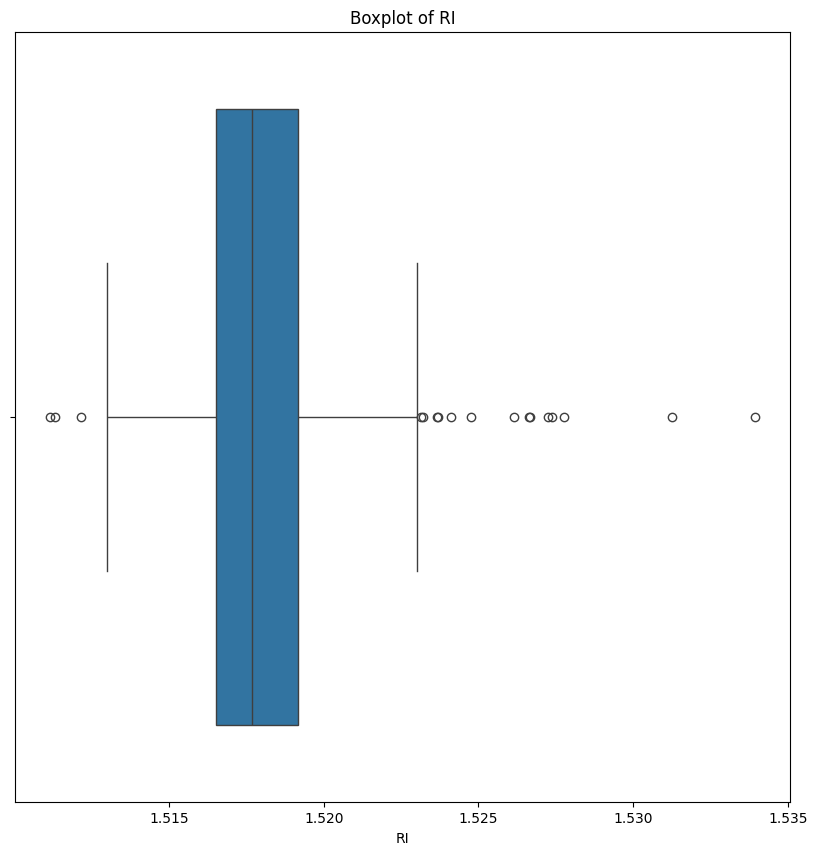

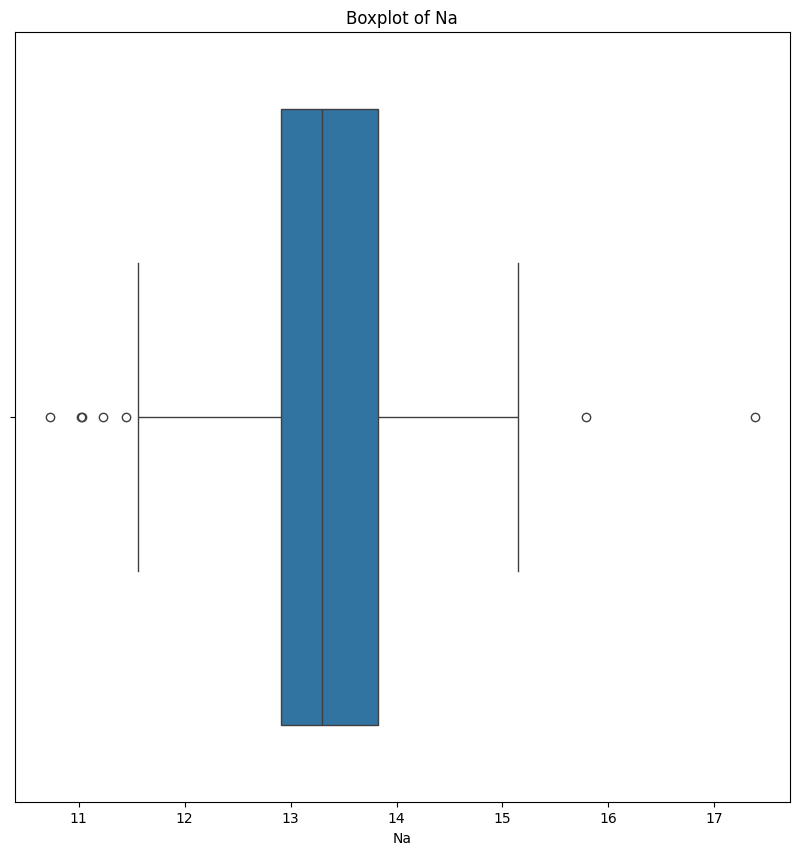

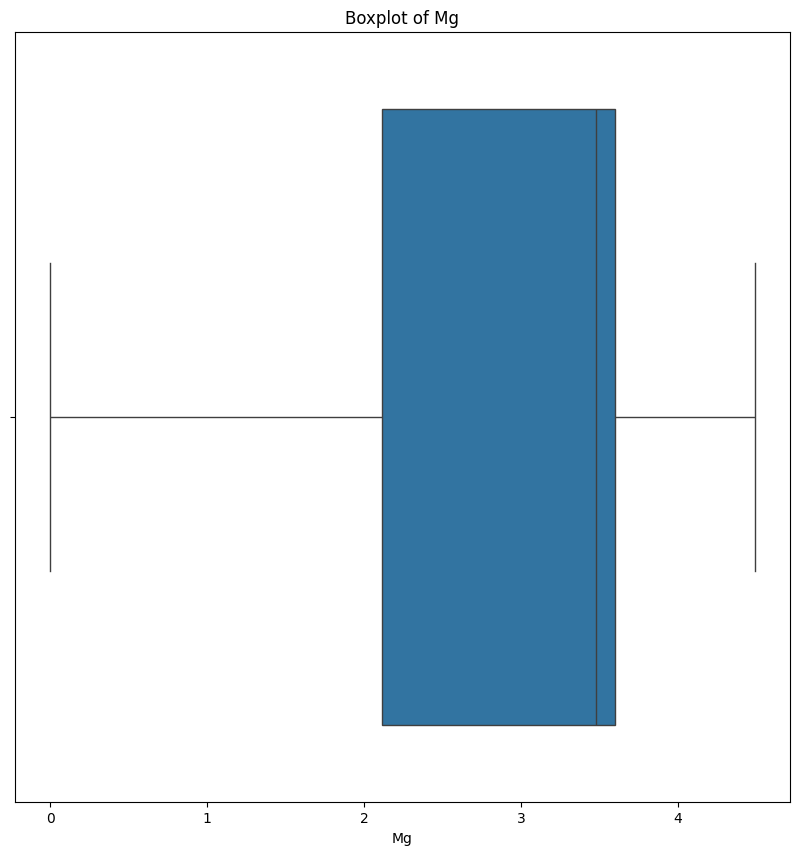

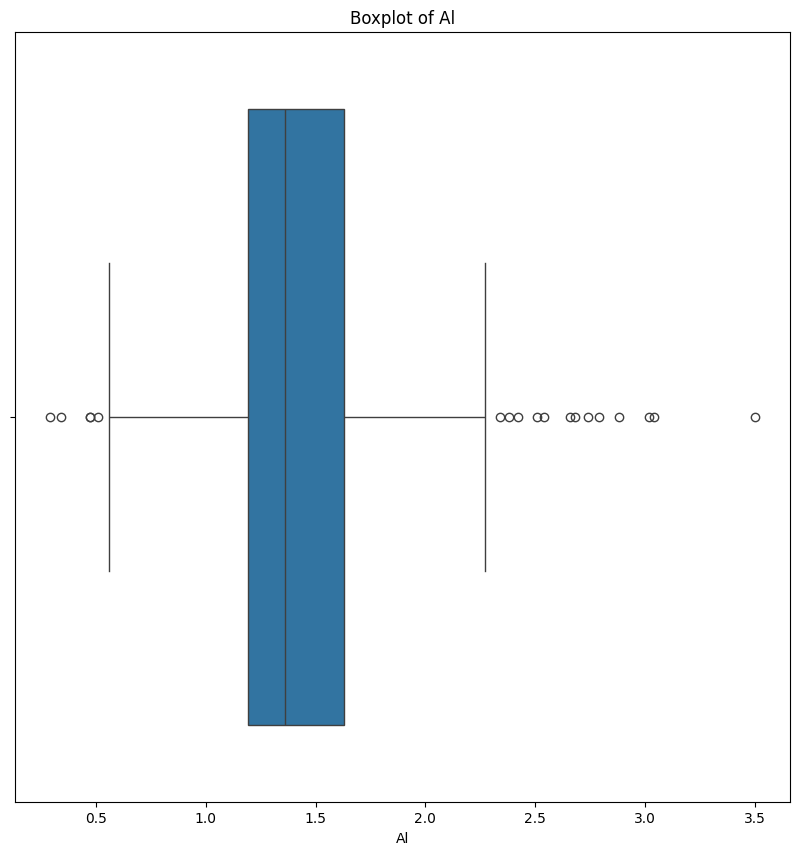

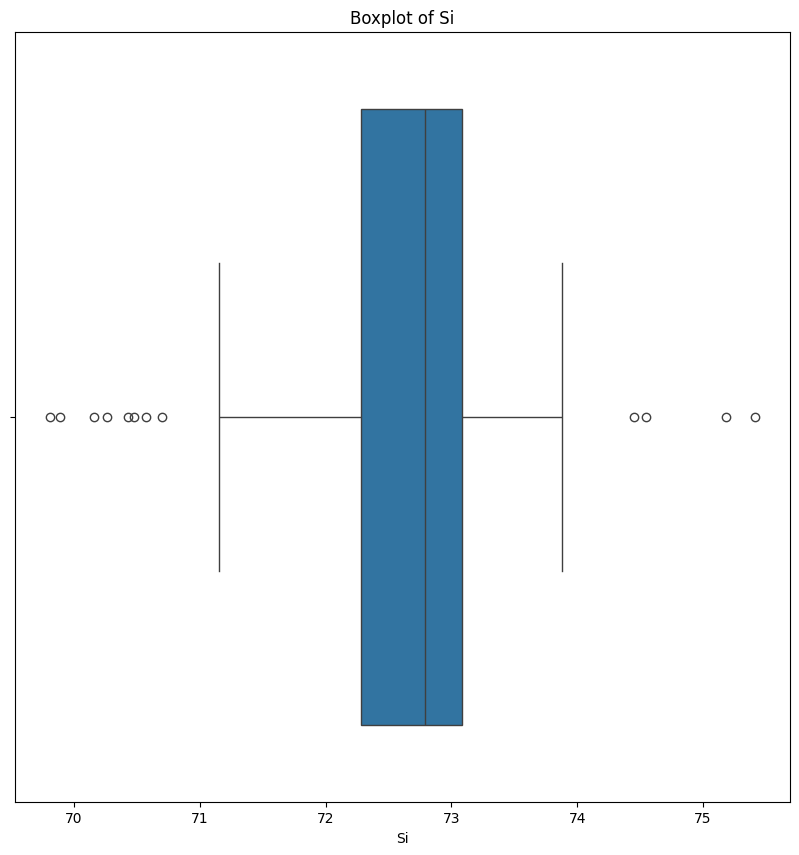

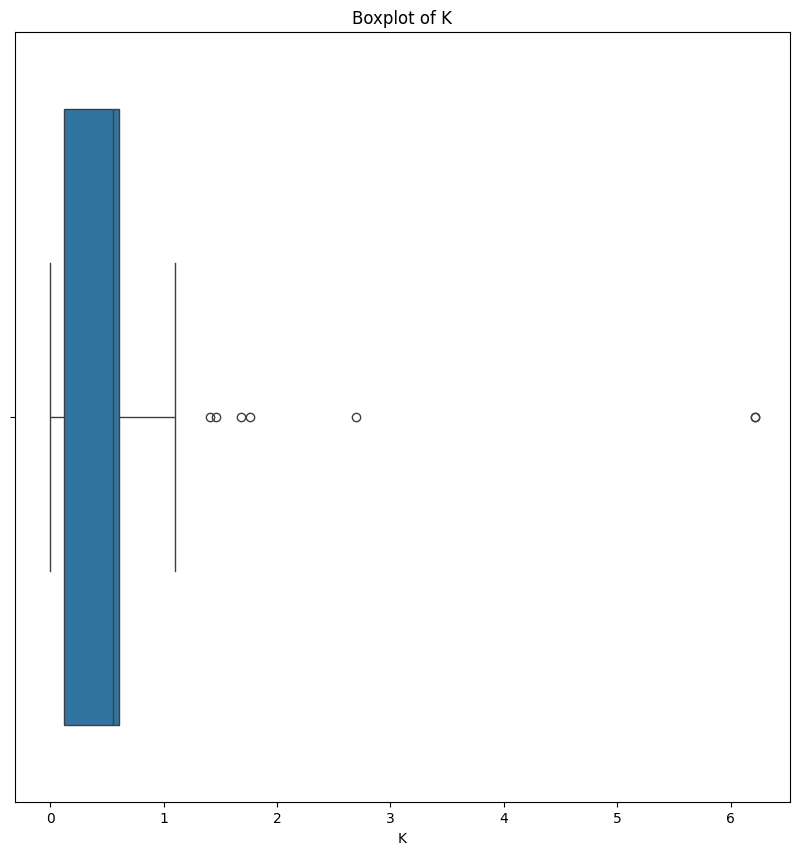

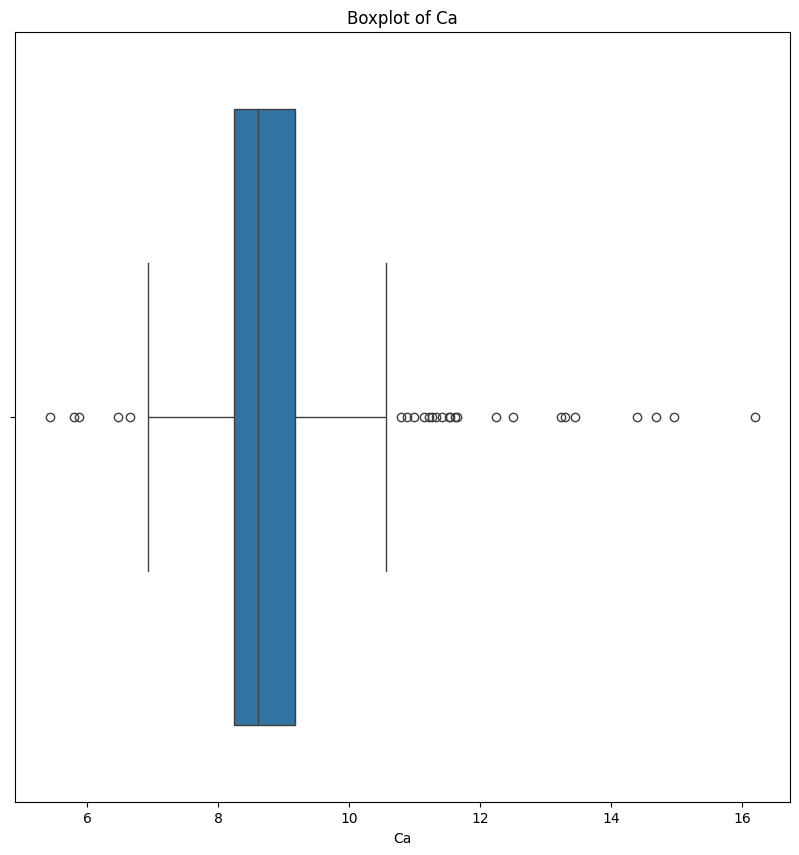

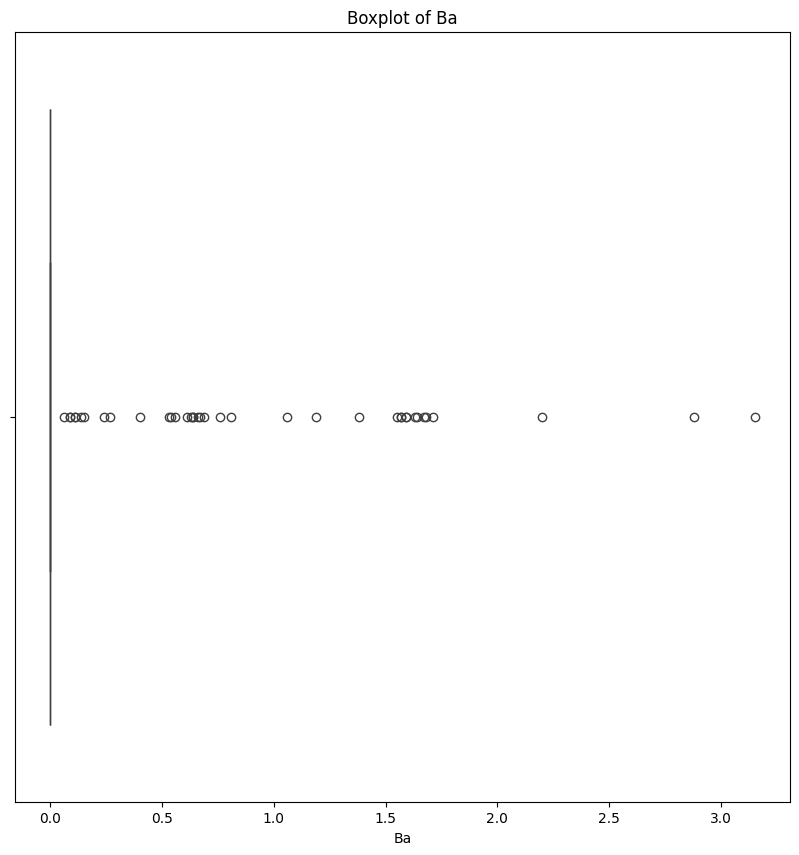

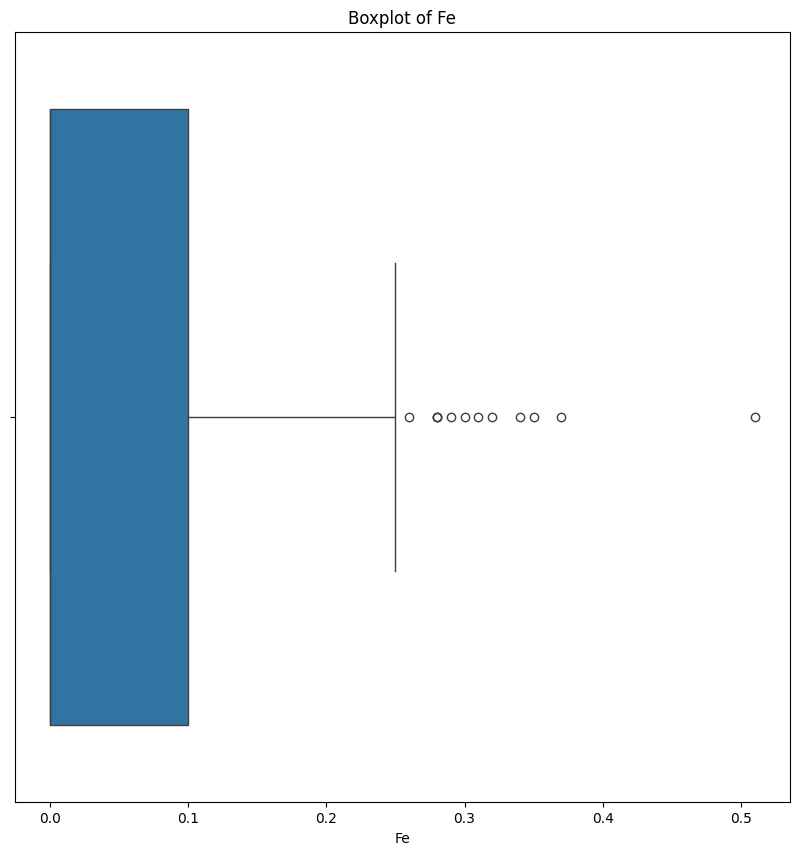

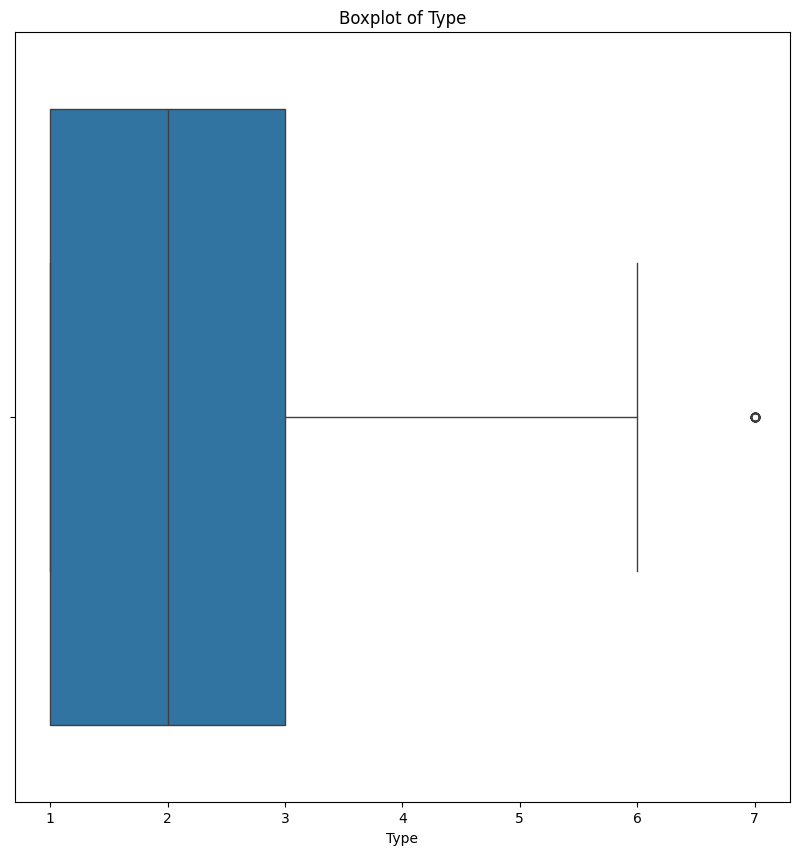

In [19]:
## Check the outliers 
for column in df[1:-1]:  # Excluding 'Id' and 'Type'
    plt.figure(figsize=(10, 10))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [20]:
# Check unique values in 'Type' column to ensure they are consistent ,Check the inconsistence data
print(df['Type'].value_counts())

2.0    76
1.0    70
7.0    29
3.0    17
5.0    13
6.0     9
Name: Type, dtype: int64


In [21]:
# Calculate correlations
correlation_matrix = features.corr()

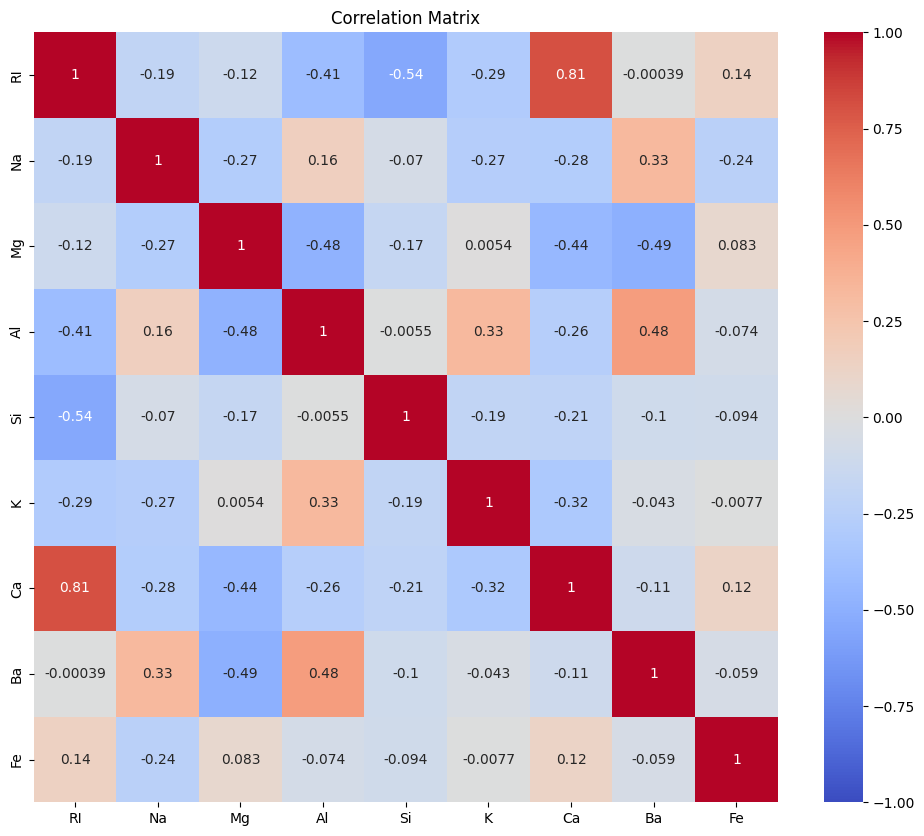

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

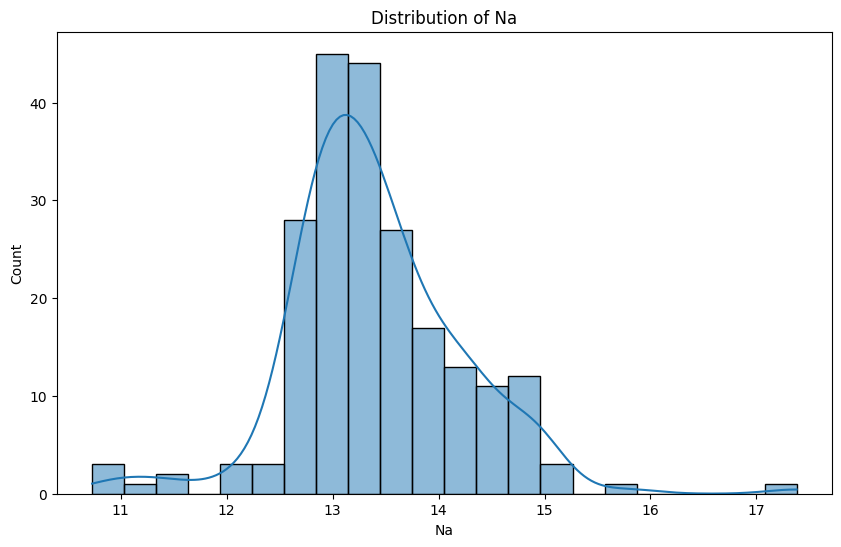

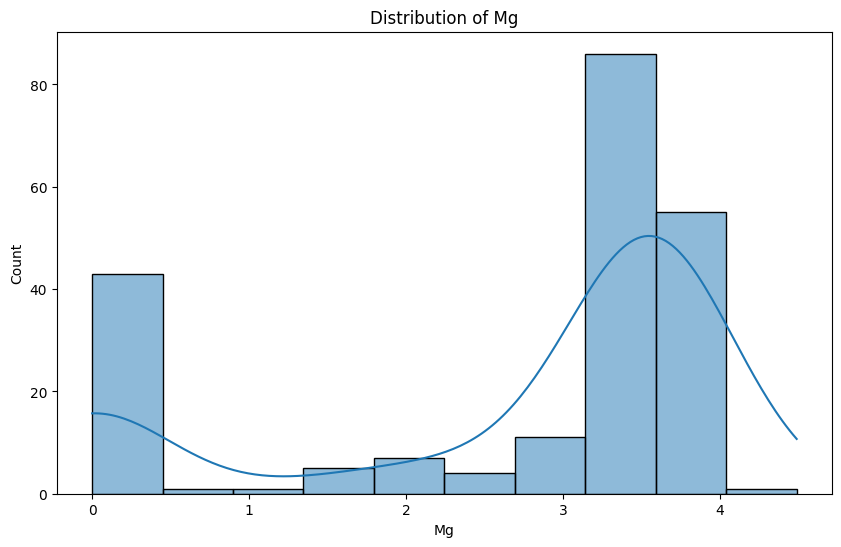

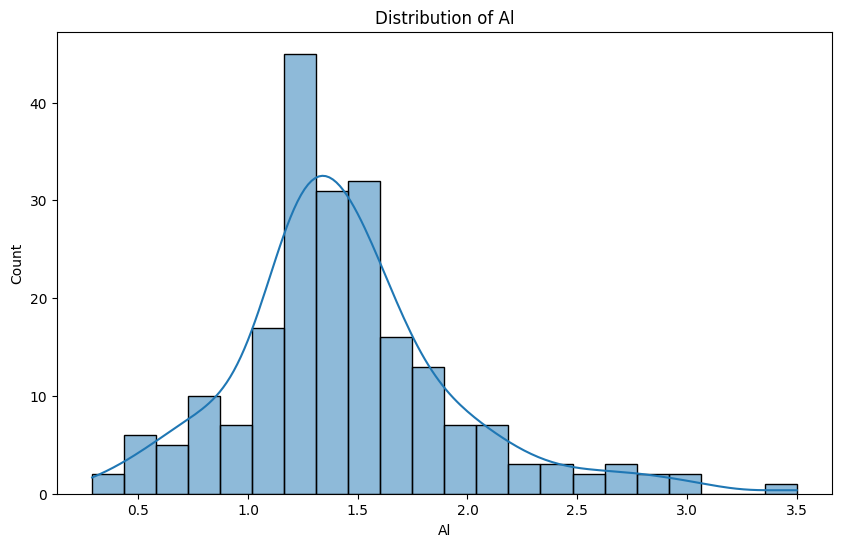

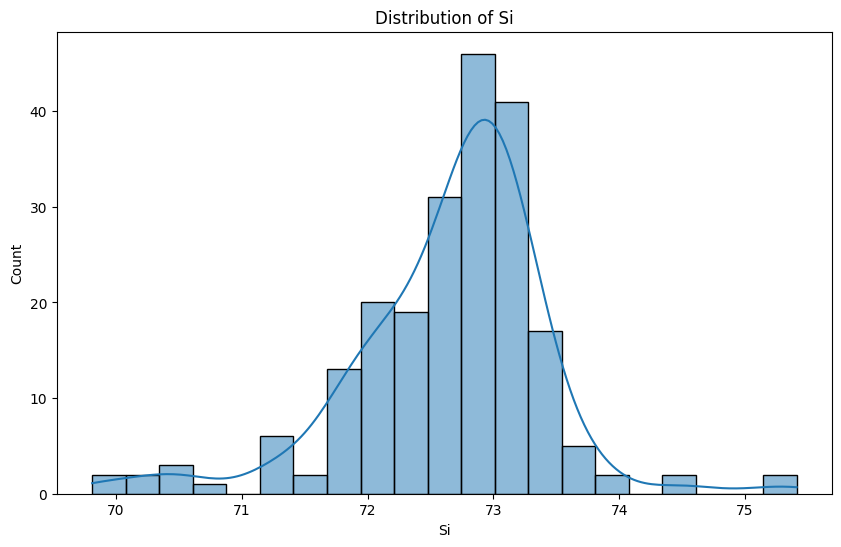

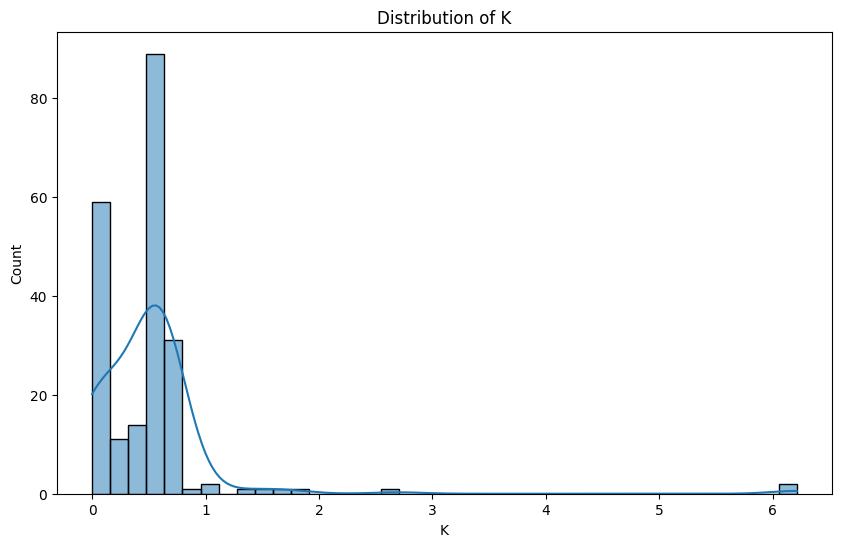

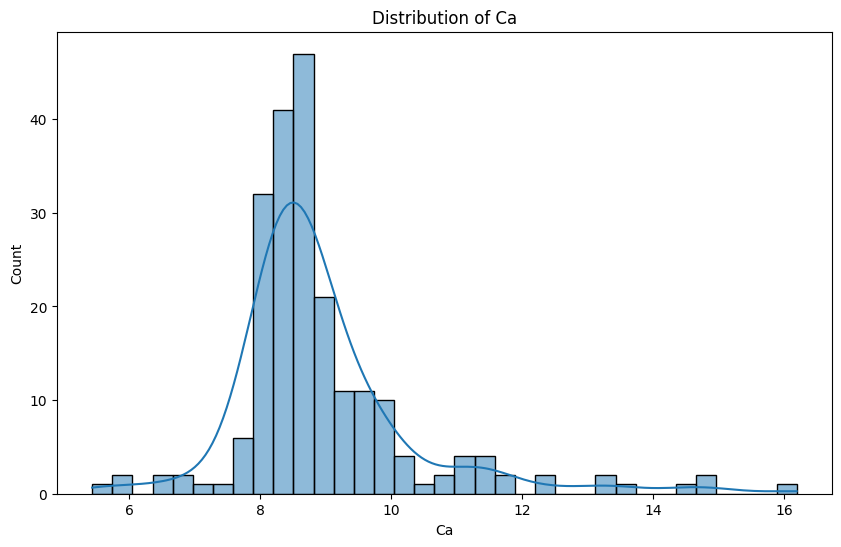

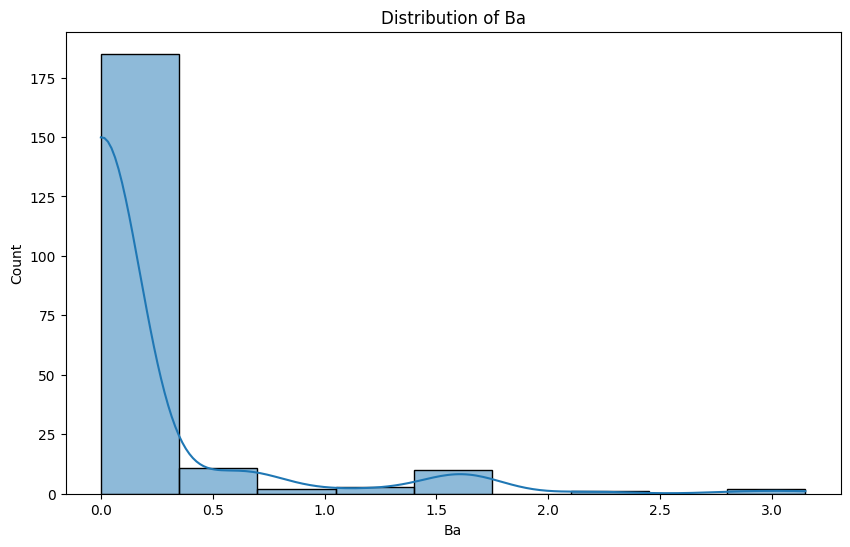

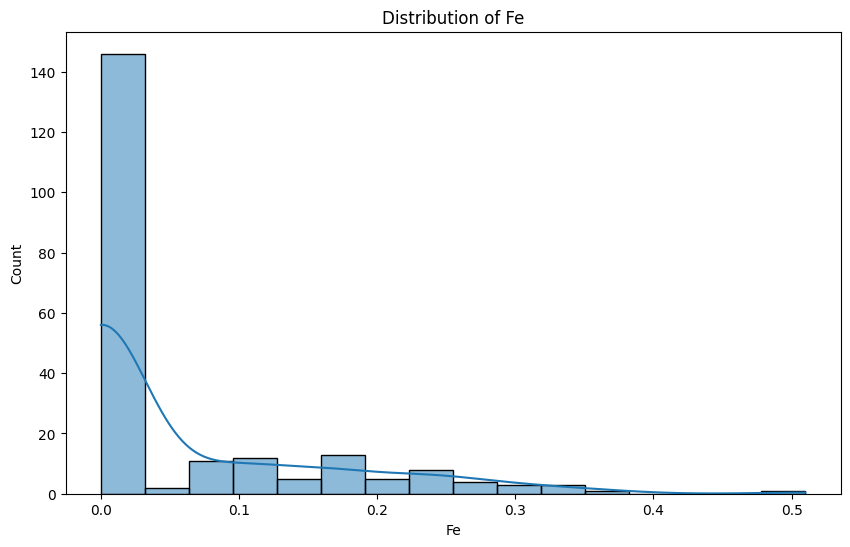

In [23]:
# Plot histograms for each feature
for column in df.columns[1:-1]:  # Excluding 'Id' and 'Type'
    plt.figure(figsize=(10, 6))
    sns.histplot(features[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [24]:
cat_col= [i for i in df.columns if df[i].dtypes=='O']
cat_col                                                     ## there is no categorical column so we dont apply any labelling technique

[]

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
std= StandardScaler() 

In [27]:
data_standardized = pd.DataFrame(std.fit_transform(features))

In [28]:
data_standardized

,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
normalizer=MinMaxScaler()

In [31]:
data_normalizer = pd.DataFrame(normalizer.fit_transform(features))

In [32]:
data_normalizer

,0,1,2,3,4,5,6,7,8
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0
...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
features=pd.get_dummies(features,dtype='int')

In [34]:
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data_imputed_df= pd.DataFrame(data_imputed,columns=df.columns)

In [36]:
print(data_imputed_df)

           RI        Na        Mg        Al         Si         K        Ca  \
0    1.521010  13.64000  4.490000  1.100000  71.780000  0.060000  8.750000   
1    1.517610  13.89000  3.600000  1.360000  72.730000  0.480000  7.830000   
2    1.516180  13.53000  3.550000  1.540000  72.990000  0.390000  7.780000   
3    1.517660  13.21000  3.690000  1.290000  72.610000  0.570000  8.220000   
4    1.517420  13.27000  3.620000  1.240000  73.080000  0.550000  8.070000   
..        ...       ...       ...       ...        ...       ...       ...   
994  1.518365  13.40785  2.684533  1.444907  72.650935  0.497056  8.956963   
995  1.518365  13.40785  2.684533  1.444907  72.650935  0.497056  8.956963   
996  1.518365  13.40785  2.684533  1.444907  72.650935  0.497056  8.956963   
997  1.518365  13.40785  2.684533  1.444907  72.650935  0.497056  8.956963   
998  1.518365  13.40785  2.684533  1.444907  72.650935  0.497056  8.956963   

           Ba        Fe      Type  
0    0.000000  0.000000  1.

In [37]:
pd.DataFrame(data_imputed_df).isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [38]:
data_imputed_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.521010,13.64000,4.490000,1.100000,71.780000,0.060000,8.750000,0.000000,0.000000,1.000000
1,1.517610,13.89000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000,1.000000
2,1.516180,13.53000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000,1.000000
3,1.517660,13.21000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000,1.000000
4,1.517420,13.27000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
994,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
995,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
996,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
997,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374


In [39]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(749, 9)
(250, 9)
(749, 1)
(250, 1)


In [41]:
from sklearn.ensemble import RandomForestClassifier
rand_for= RandomForestClassifier(n_estimators=100,bootstrap=True,criterion='gini',max_depth=3 )

In [42]:
Features=data_imputed_df.drop('Type',axis=1)
Target=data_imputed_df[['Type']]

In [43]:
Features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.521010,13.64000,4.490000,1.100000,71.780000,0.060000,8.750000,0.000000,0.000000
1,1.517610,13.89000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000
2,1.516180,13.53000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000
3,1.517660,13.21000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000
4,1.517420,13.27000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
994,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
995,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
996,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
997,1.518365,13.40785,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009


In [44]:
Target

,Type
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
994,2.780374
995,2.780374
996,2.780374
997,2.780374


In [45]:
pd.DataFrame(Features).isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [46]:
from sklearn.ensemble import RandomForestRegressor
rand_for= RandomForestClassifier(n_estimators=100,bootstrap=True,criterion='gini',max_depth=3 )

In [47]:
x_train,x_test,y_train,y_test=train_test_split(Features,Target,train_size=0.75,random_state=100)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(749, 9)
(250, 9)
(749, 1)
(250, 1)


In [49]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rand_for_regressor = RandomForestRegressor()

# Fit the model
rand_for_regressor.fit(x_train, y_train)


/Users/rahulpoojith/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [50]:
y_pred = rand_for_regressor.predict(x_test)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

In [52]:
r2

0.6340061658490856

In [53]:
mse = mean_squared_error(y_test, y_pred)

In [54]:
mse

0.42734333638745736

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
rf = RandomForestRegressor()

In [57]:
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse']
}

In [58]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [59]:
grid_search.fit(x_train,y_train)

/Users/rahulpoojith/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulpoojith/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulpoojith/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulpoojith/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [60]:
print(grid_search.param_grid)

{'n_estimators': [100, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['squared_error', 'absolute_error', 'friedman_mse']}


In [61]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'friedman_mse', 'max_features': 'sqrt', 'n_estimators': 200}


In [62]:
y_pred = grid_search.best_estimator_.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.3311155069875098


In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
bag_class= BaggingRegressor(estimator=KNeighborsRegressor(),n_estimators=50,bootstrap=True,random_state=50)

In [64]:
bag_class.fit(x_train,y_train)

/Users/rahulpoojith/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=50,
                 random_state=50)

In [65]:
y_pred=bag_class.predict(x_test)

In [66]:
r2 = r2_score(y_test, y_pred)
r2

0.6716163783064714

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [68]:
x_train, x_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

In [69]:
boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
boosting_model.fit(x_train, y_train)

/Users/rahulpoojith/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(random_state=42)

In [70]:
y_pred_boosting = boosting_model.predict(x_test)

In [71]:
mse_boosting = mean_squared_error(y_test, y_pred_boosting)

In [72]:
mse_boosting

0.07773405739226685

In [73]:
bagging_model = RandomForestRegressor(n_estimators=100, random_state=42)
boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit models
bagging_model.fit(x_train, y_train)
boosting_model.fit(x_train, y_train)

# Predictions
y_pred_bagging = bagging_model.predict(x_test)
y_pred_boosting = boosting_model.predict(x_test)

# Evaluate
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mse_boosting = mean_squared_error(y_test, y_pred_boosting)

print(f"Bagging Mean Squared Error: {mse_bagging:.2f}")
print(f"Boosting Mean Squared Error: {mse_boosting:.2f}")


Bagging Mean Squared Error: 0.04
Boosting Mean Squared Error: 0.08


/Users/rahulpoojith/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rahulpoojith/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Explain Bagging and Boosting methods. How is it different from each other.

Bagging is ideal for reducing the variance of a model and is often used with high-variance models (e.g., decision trees). It creates multiple models independently and combines their predictions.

Boosting improves model performance by sequentially training models to correct errors from previous models, focusing on reducing bias as well as variance. It combines predictions in a weighted manner to improve accuracy.

Both methods are powerful techniques for enhancing the performance of machine learning models, and the choice between them depends on the specific problem, data characteristics, and goals of the analysis.

Explain how to handle imbalance in the data.

Here's how you can explain handling imbalanced datasets in a machine learning interview:

Resampling: Modify the sample distribution by adding more instances of the minority class (oversampling) or removing instances from the majority class (undersampling).

Data augmentation: Create new data instances by applying transformations to existing data. This is a powerful technique for computer vision tasks, but can also be used for other types of data.

Algorithms: Use algorithms designed for imbalanced data, like SMOTE (Synthetic Minority Over-sampling Technique) or ensemble methods.

Evaluation metrics: Use different evaluation metrics like F1-score, AUC-ROC, or precision-recall curves.

Class weights: Adjust class weights inversely proportional to class frequencies.

Weighted loss function: Use a weighted loss function.

Collect more data: Collect more data for the minority class.

Stratified sampling: Use stratified sampling. 


In machine learning, “imbalanced classes” is a familiar problem particularly occurring in classification when we have datasets with an unequal ratio of data points in each class.

Training of model becomes much trickier as typical accuracy is no longer a reliable metric for measuring the performance of the model. Now if the number of data points in minority class is much less, then it may end up being completely ignored during training.

